In [2]:
from census import Census

import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
import pingouin as pg
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [5]:
grouped = df.groupby('year')['tempo'].mean()

In [6]:
grouped_df = pd.DataFrame(grouped)

<AxesSubplot:xlabel='year'>

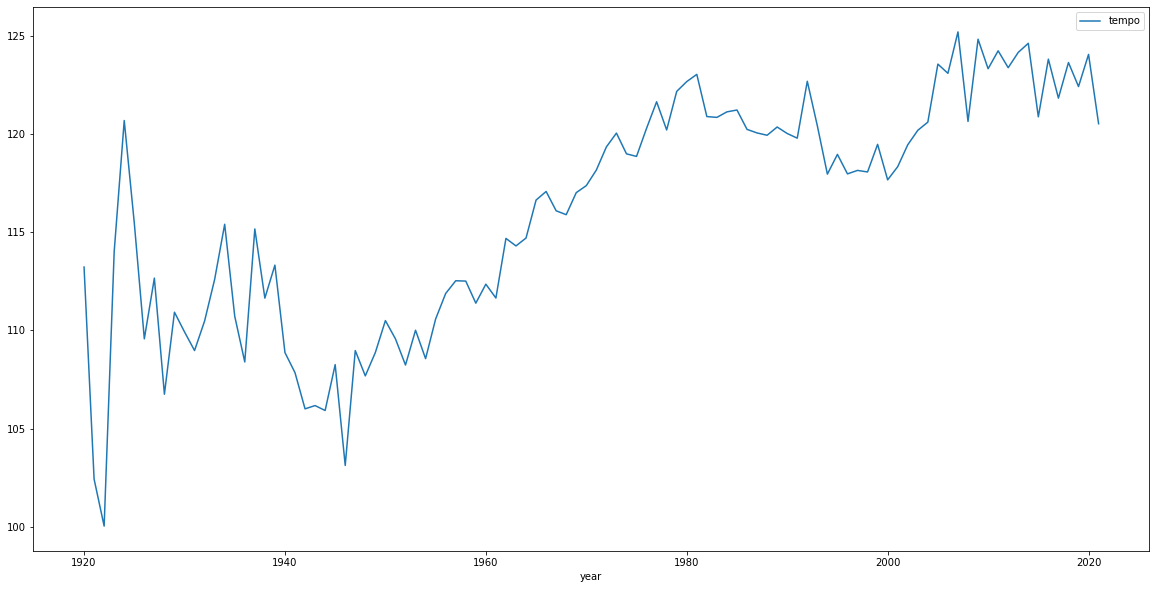

In [7]:
grouped_df.plot(kind='line',figsize=(20,10))

In [10]:
columns_1 = df.columns[0:]
df_final = pd.DataFrame(columns = columns_1)
df_final

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year


In [11]:
year_list = range(1920,2021,1)

for year in year_list:
    
    df_sample = df[df['year'] == year]
    df_new = df_sample[df_sample['popularity'] == df_sample['popularity'].max()]
    df_final = pd.concat([df_new , df_final])

    df_final

In [14]:
df_final['duration_ms'] = df_final['duration_ms'].astype(float)
df_final['explicit'] = df_final['explicit'].astype(int)
df_final['key'] = df_final['key'].astype(float)
df_final['popularity'] = df_final['popularity'].astype(int)

In [15]:
df_final['duration_ms'] = df_final['duration_ms']/60000
df_final.rename(columns={'duration_ms':'duration (s)'},inplace = True)

In [16]:
df_final_mean = df_final.groupby('year').mean().reset_index()

In [17]:
df_final_mean.dtypes

year                  int64
acousticness        float64
danceability        float64
duration (s)        float64
energy              float64
explicit            float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
popularity          float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

In [18]:
df_final_mean

,year,acousticness,danceability,duration (s),energy,explicit,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence
0,1920,0.7330,0.3390,9.135450,0.1920,0.0,0.677000,0.0,0.44300,-18.9590,28.0,0.04240,150.752,0.1800
1,1921,0.7320,0.8190,3.008883,0.3410,0.0,0.000000,7.0,0.16000,-12.4410,6.0,0.41500,60.936,0.9630
2,1922,0.6740,0.6450,2.115050,0.4450,0.0,0.744000,0.0,0.15100,-13.3380,6.0,0.45100,104.851,0.1270
3,1923,0.9960,0.6140,2.952217,0.0423,0.0,0.002930,4.0,0.18300,-12.0330,41.0,0.05350,89.822,0.2110
4,1924,0.8160,0.6780,3.433333,0.3950,0.0,0.240000,3.0,0.10000,-9.8250,15.0,0.13300,184.446,0.8320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2016,0.7010,0.3110,3.480450,0.4850,0.0,0.000000,6.0,0.07260,-5.7260,88.0,0.03650,77.355,0.2250
97,2017,0.2656,0.8240,2.695667,0.5855,0.5,0.000002,5.0,0.18900,-6.7590,87.0,0.18500,129.485,0.5515
98,2018,0.4830,0.7160,2.765117,0.5120,0.0,0.000000,1.0,0.09280,-6.2570,91.0,0.03310,104.957,0.3260
99,2019,0.1220,0.5480,2.900000,0.8160,0.0,0.000000,0.0,0.33500,-4.2090,91.0,0.04650,95.390,0.5570


In [19]:
df_final_mean.to_csv('Popularity_df_mean.csv')

In [20]:
column_list = df_final_mean.columns[1:]
column_list

Index(['acousticness', 'danceability', 'duration (s)', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

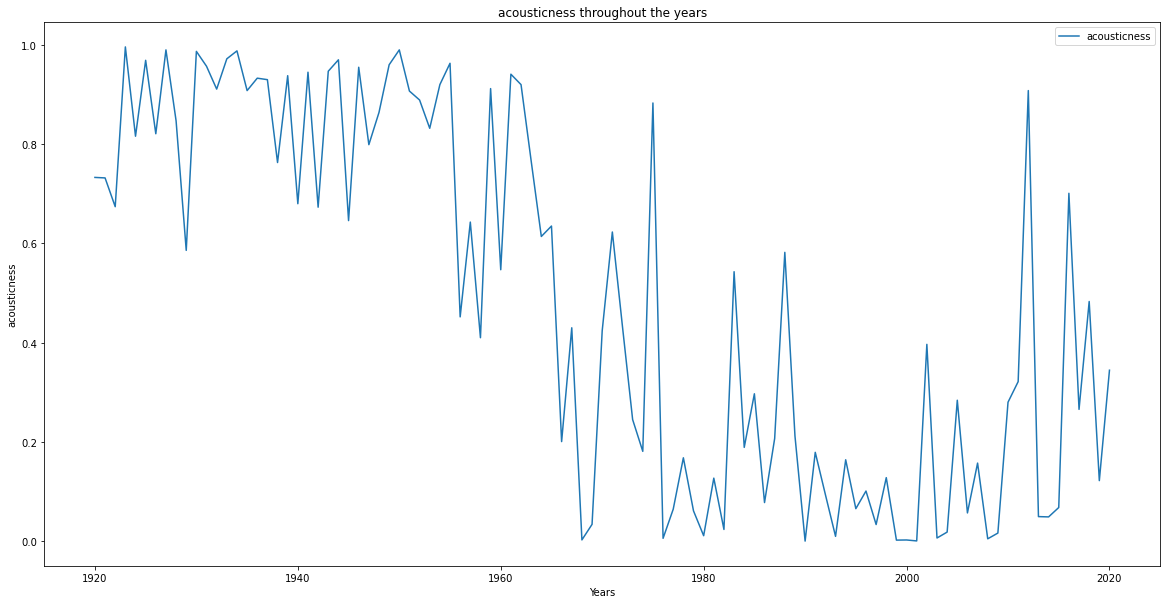

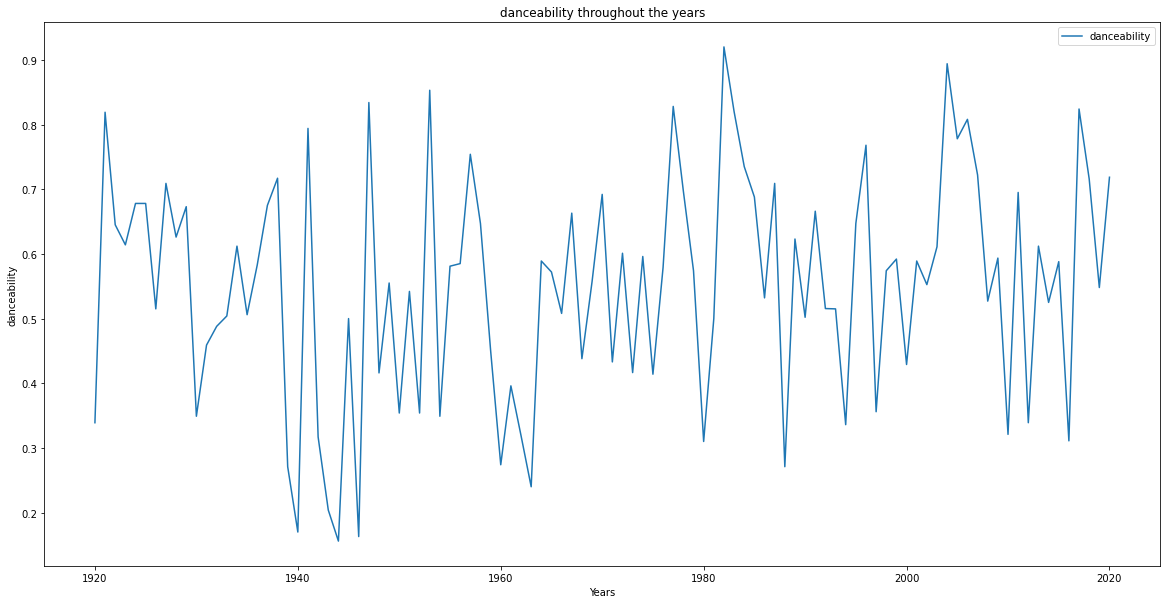

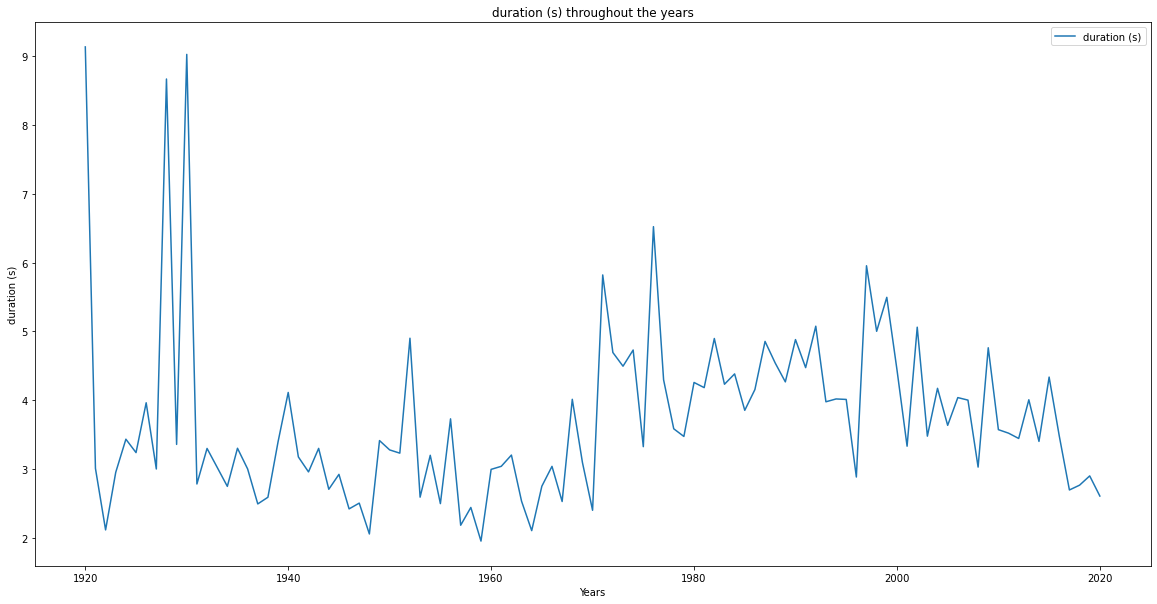

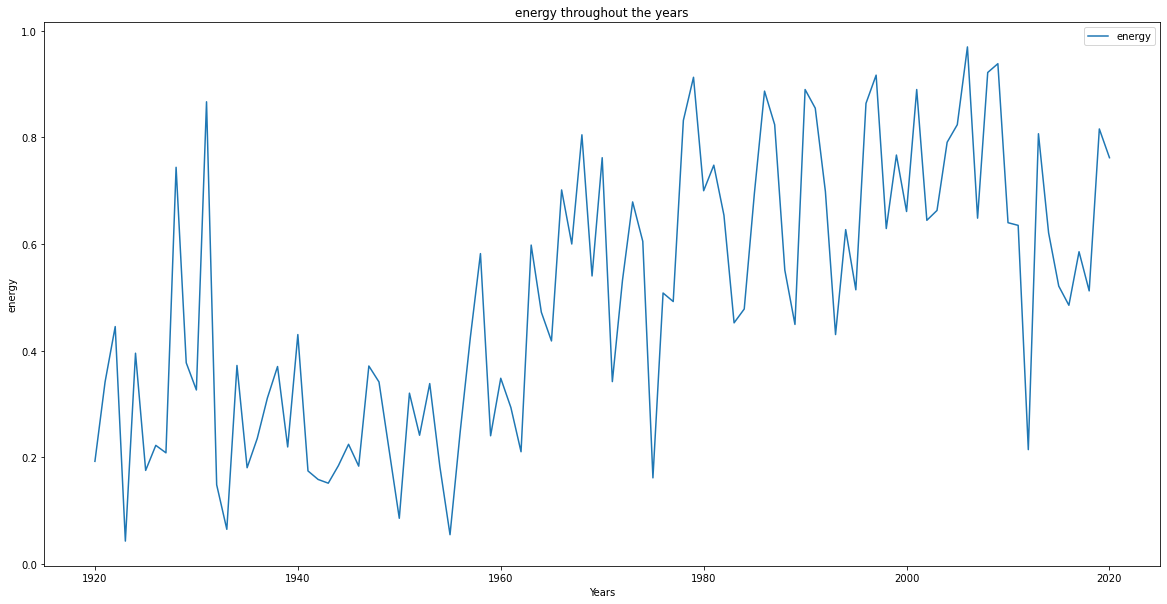

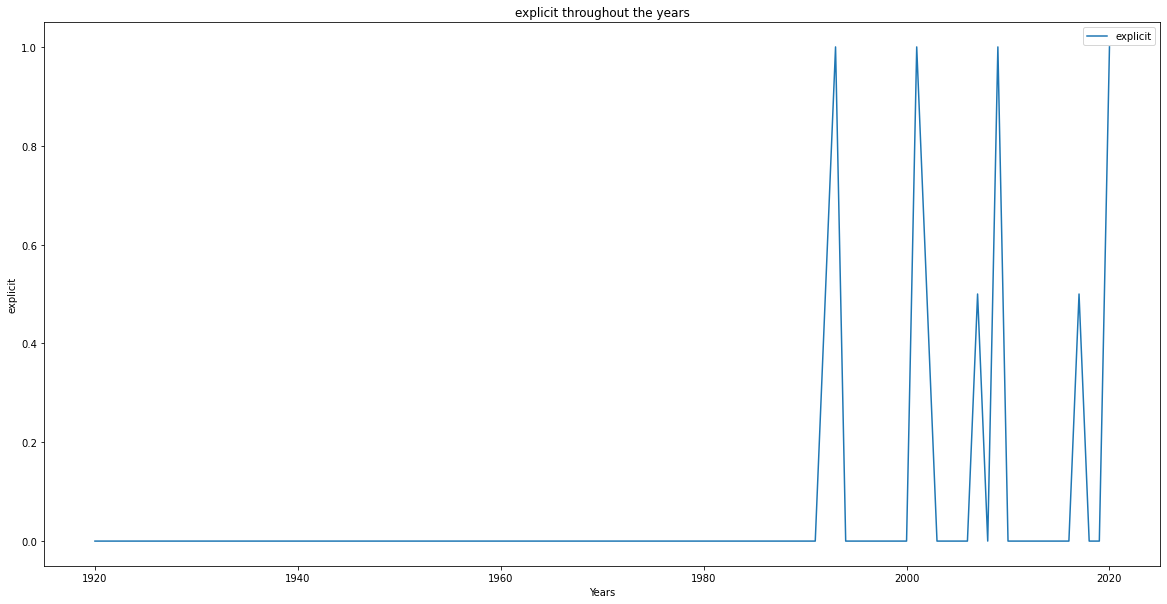

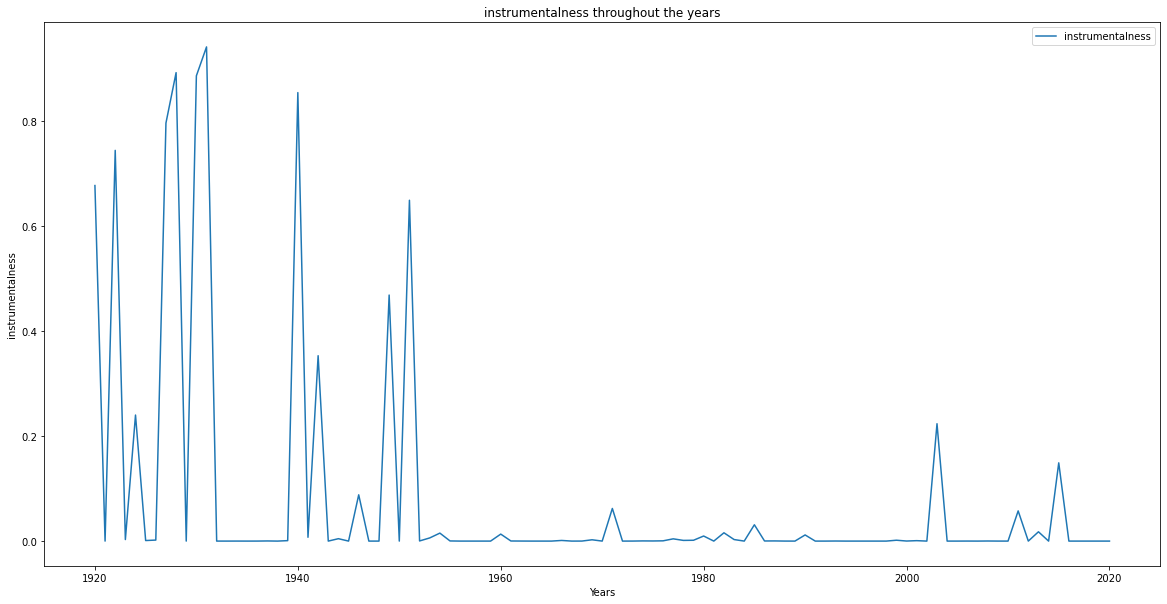

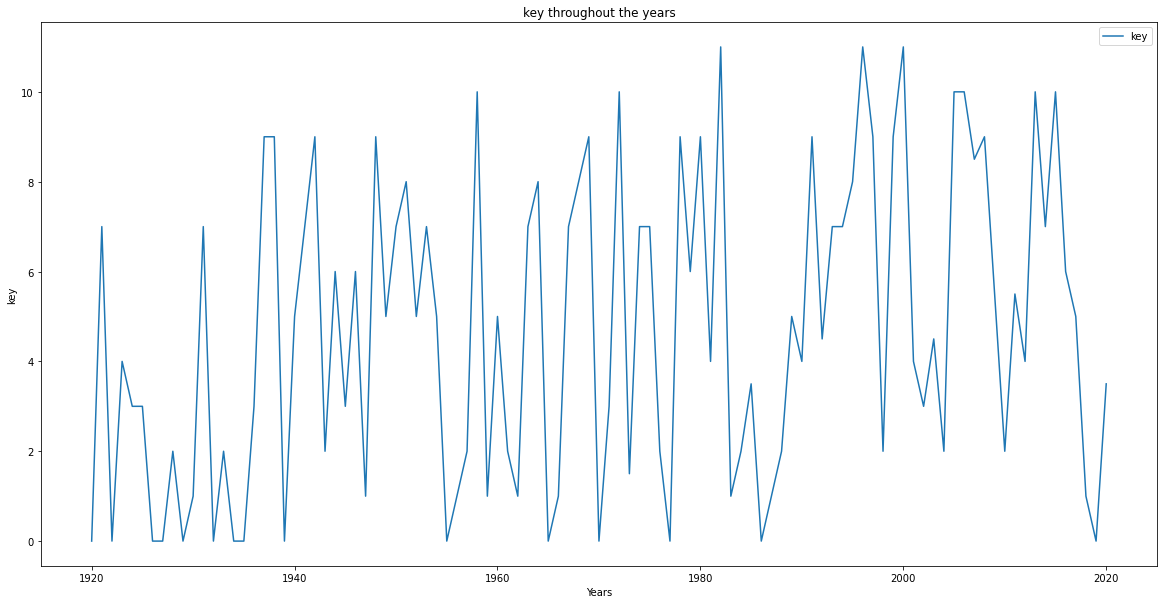

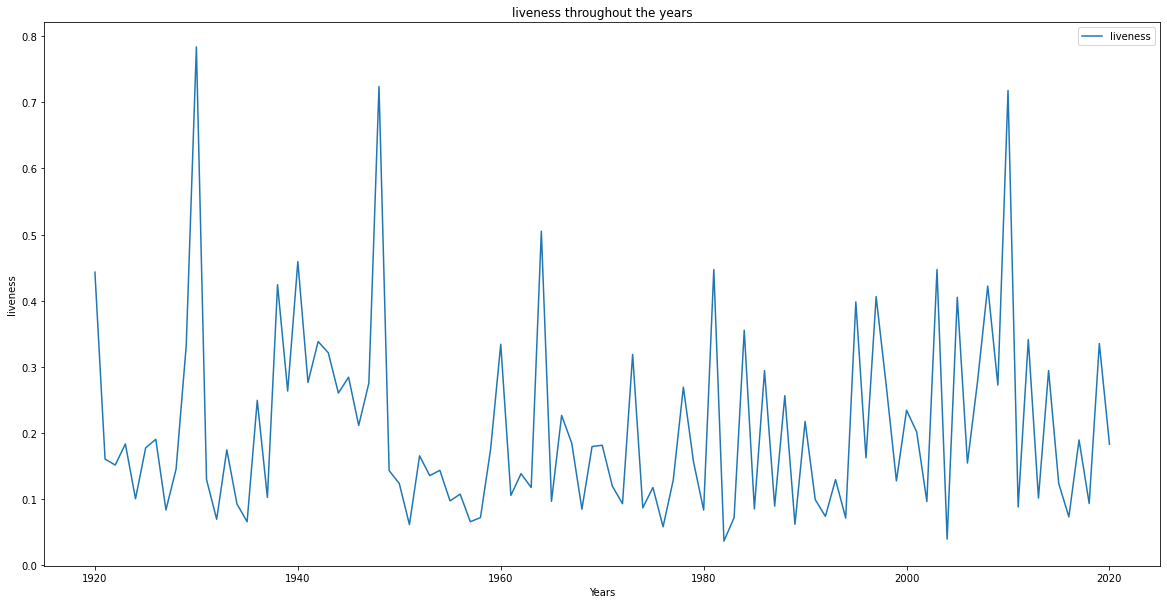

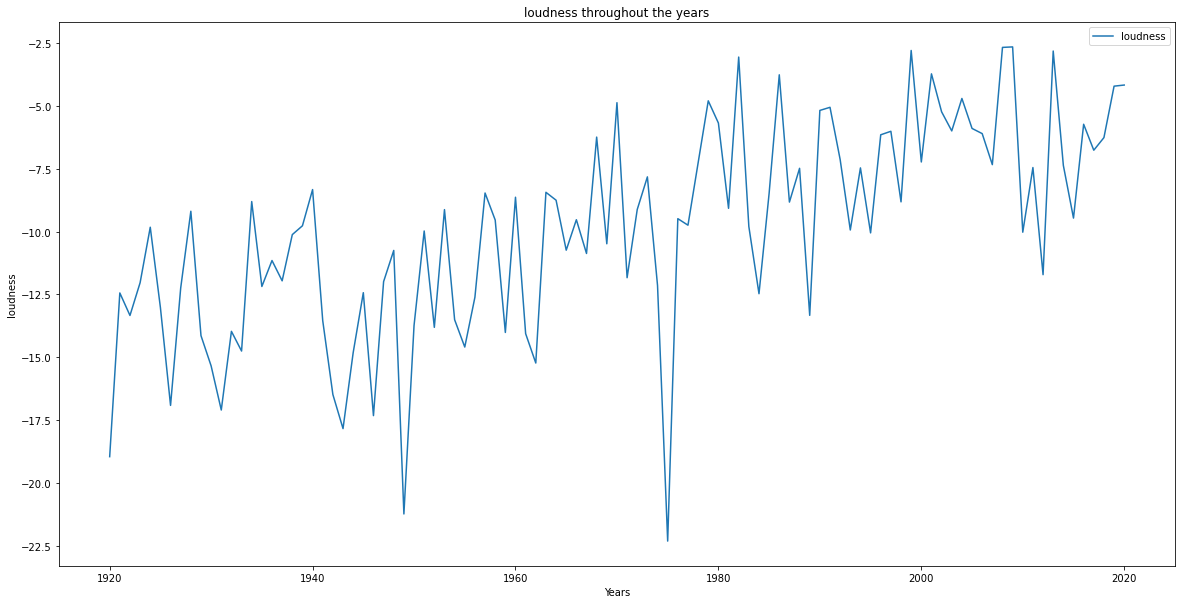

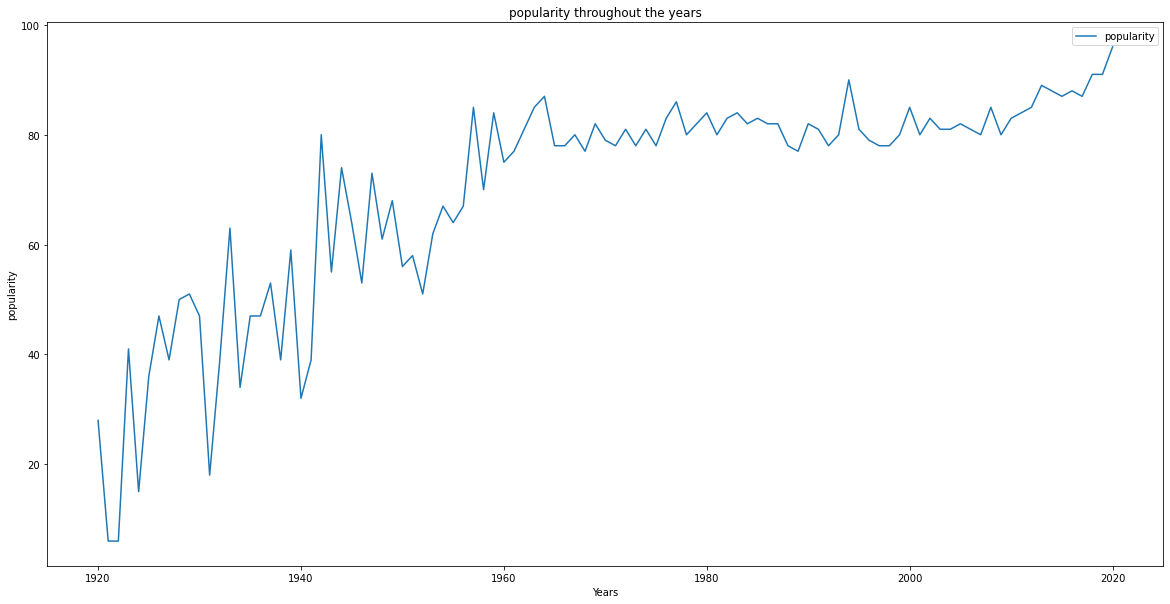

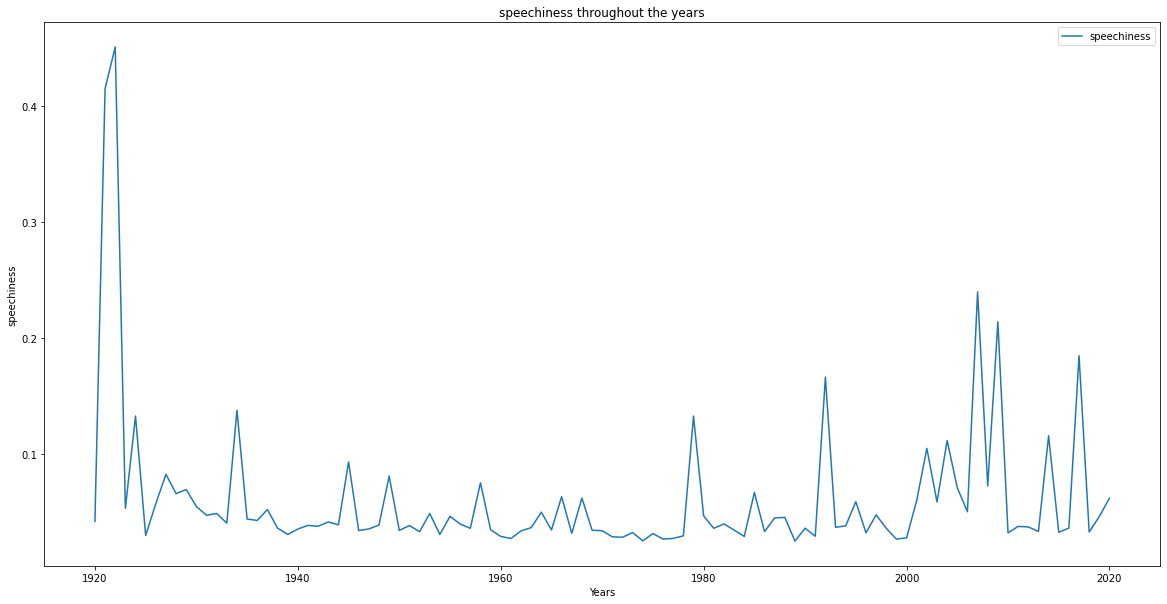

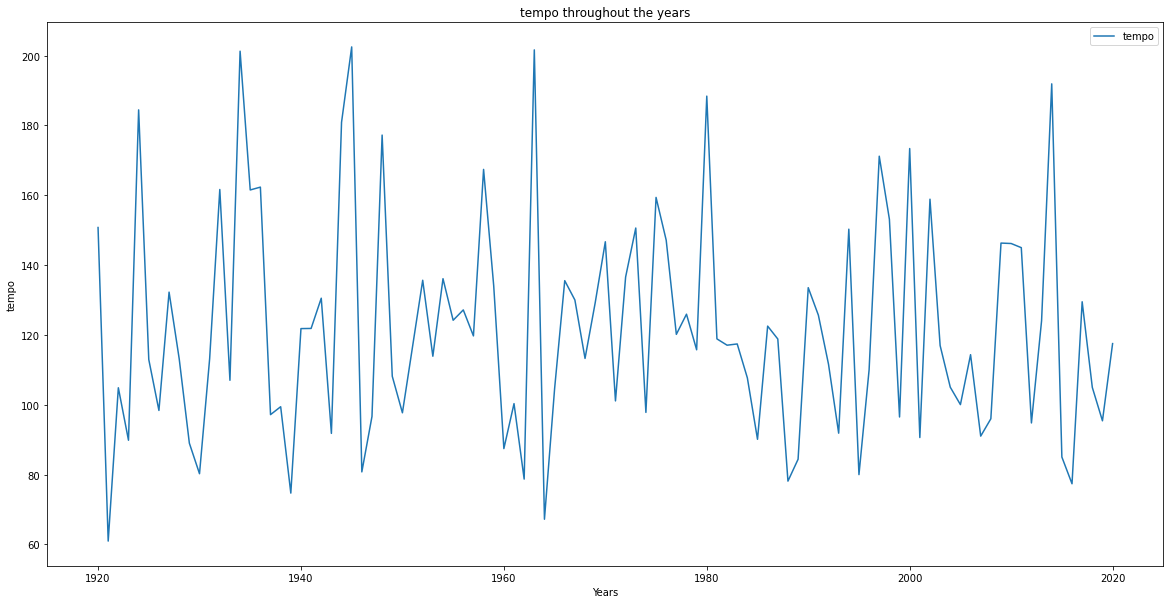

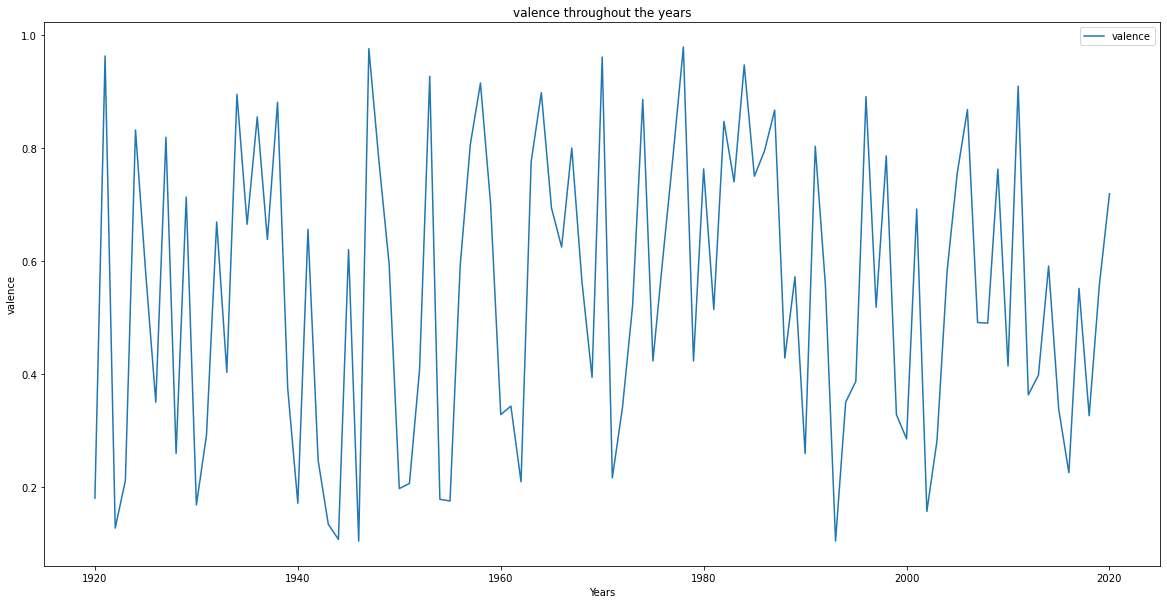

In [22]:
for i in column_list:
    df_final_mean.plot(kind='line',x='year',y=i,figsize=(20,10))
    plt.title(f'{i} throughout the years')
    plt.xlabel('Years')
    plt.ylabel(i)
    plt.show();